# MLF Set 2
#### Name: Frank Feng 冯烯
#### Student ID: 2201212354

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [2]:
# convert .csv file into Pandas dataframe
df_train = pd.read_csv('D:\VSCodeProject\MLF\Set_2\cs-training.csv')

# Fill-in the missing values (nan) with the column means
df_train = df_train.fillna(df_train.mean())

# Get X, y, features
X_train = df_train.iloc[:,2:]
y_train = df_train['SeriousDlqin2yrs']
features = X_train.columns

# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

### Extract a few (>2) features using PCA method

array([0.29948872, 0.1533157 , 0.12254696, 0.10092078, 0.10010863,
       0.09344974, 0.073465  , 0.05430268, 0.00172094, 0.00068085])

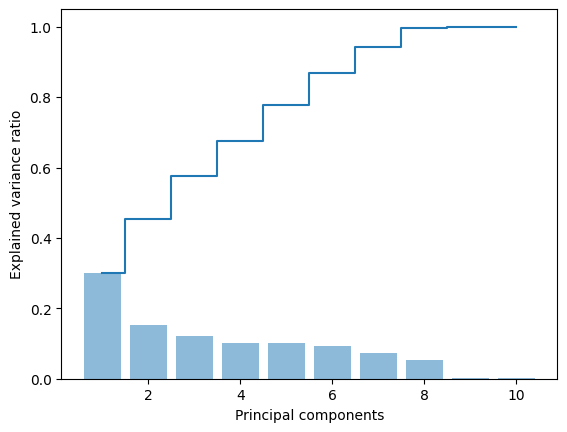

In [3]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
display(pca.explained_variance_ratio_)
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

As the figure above has shown, the first 8 features explain almost all the variance, so we choose the first 8 features.

### Use pipeline

In [4]:
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components=8), SVC(random_state=1))
param_C_range = [0.1, 1.0, 10.0]
param_gama_range = [0.01, 0.1, 1.0]
param_grid = [{'svc__C': param_C_range, 
               'svc__gamma': param_gama_range, 
               'svc__kernel': ['rbf']}]

In [5]:
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train_std, y_train)

In [6]:
print(gs.best_score_)
print(gs.best_params_)

0.93544
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [7]:
clf = gs.best_estimator_
print('Test accuracy: %.4f' % clf.score(X_train_std, y_train))

Test accuracy: 0.9374
